In [2]:
import pandas as pd
from prophet import Prophet

In [199]:
df=pd.read_csv('NSE.csv')

In [200]:
df['Date']=pd.to_datetime(df['Date'])

In [201]:
df=df[df['Date'] > '2020-08-01']

In [202]:
df.reset_index(drop=True,inplace=True)

In [203]:
df.columns=['ds','y']

In [204]:
df.head()

,ds,y
0,2020-08-03,10891.599609
1,2020-08-04,11095.250000
2,2020-08-05,11101.650391
3,2020-08-06,11200.150391
4,2020-08-07,11214.049805


In [205]:
model = Prophet()

In [206]:
model.fit(df)

16:14:06 - cmdstanpy - INFO - Chain [1] start processing
16:14:06 - cmdstanpy - INFO - Chain [1] done processing


In [207]:
new_dates=model.make_future_dataframe(365,include_history=False)

In [208]:
new_dates

,ds
0,2023-04-29
1,2023-04-30
2,2023-05-01
3,2023-05-02
4,2023-05-03
...,...
360,2024-04-23
361,2024-04-24
362,2024-04-25
363,2024-04-26


In [209]:
forecast=model.predict(new_dates)
forecast=forecast[['ds','yhat_lower','yhat_upper','yhat']]

In [210]:
df

,ds,y
0,2020-08-03,10891.599609
1,2020-08-04,11095.250000
2,2020-08-05,11101.650391
3,2020-08-06,11200.150391
4,2020-08-07,11214.049805
...,...,...
710,2023-04-24,17743.400391
711,2023-04-25,17769.250000
712,2023-04-26,17813.599609
713,2023-04-27,17915.050781


In [211]:
new_df=pd.concat([df,forecast[['ds','yhat','yhat_lower','yhat_upper']]])

In [213]:
new_df

,ds,y,yhat,yhat_lower,yhat_upper
0,2020-08-03,10891.599609,NaN,NaN,NaN
1,2020-08-04,11095.250000,NaN,NaN,NaN
2,2020-08-05,11101.650391,NaN,NaN,NaN
3,2020-08-06,11200.150391,NaN,NaN,NaN
4,2020-08-07,11214.049805,NaN,NaN,NaN
...,...,...,...,...,...
360,2024-04-23,NaN,18000.600459,14889.074662,21045.522767
361,2024-04-24,NaN,17971.718790,14865.070617,21067.921754
362,2024-04-25,NaN,17919.153787,14795.453390,21074.086705
363,2024-04-26,NaN,17866.130879,14725.009108,20971.224279


In [214]:
new_df=new_df.to_csv('NSE_forecast.csv',index=False)

In [215]:
new_df

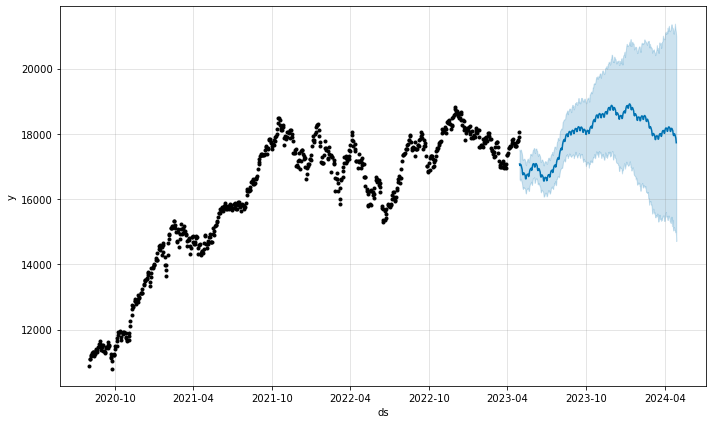

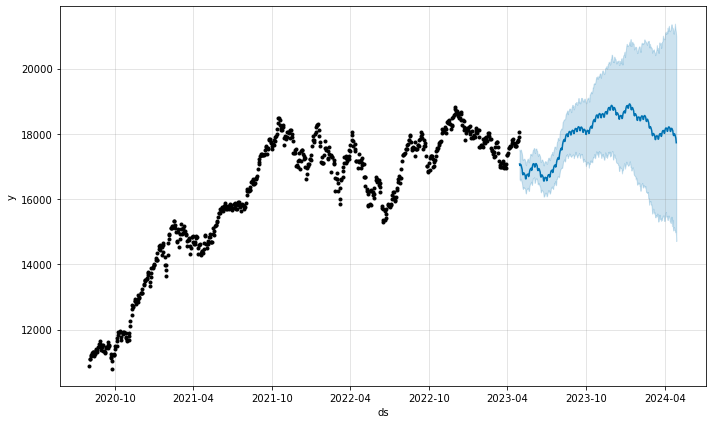

In [190]:
model.plot(forecast)

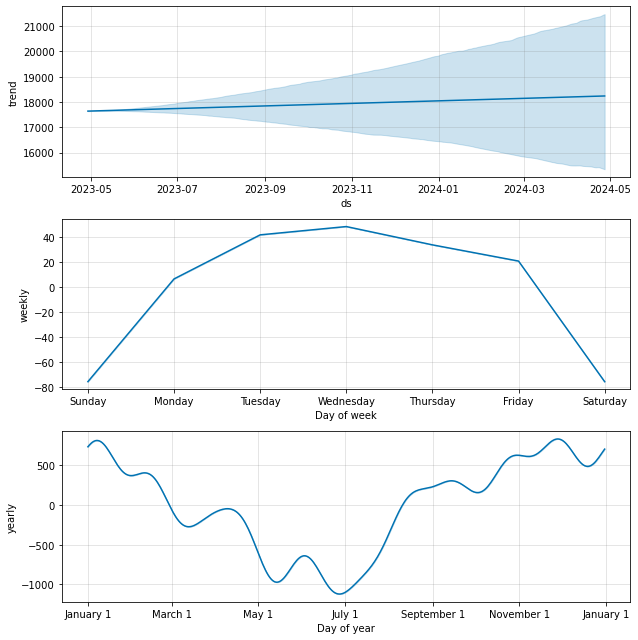

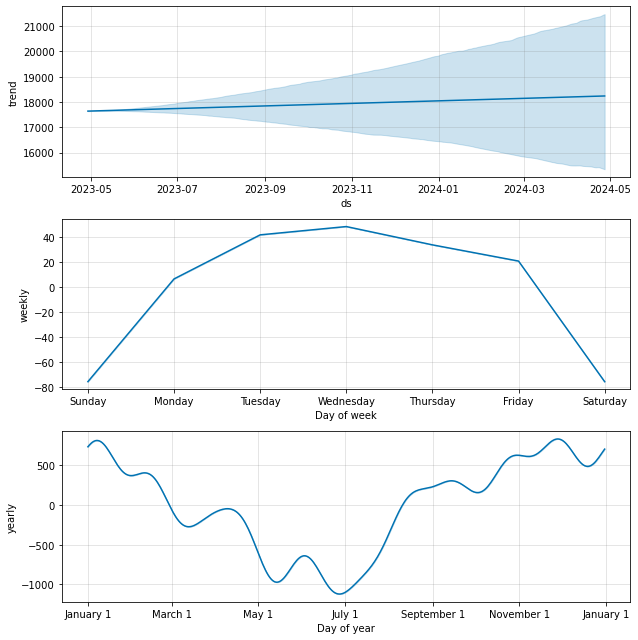

In [191]:
model.plot_components(forecast)

In [91]:
df=pd.read_csv('NSE.csv')

In [92]:
df['Date']=pd.to_datetime(df['Date'])

In [93]:
df=df[df['Date'] > '2020-08-01']

In [94]:
df.reset_index(drop=True,inplace=True)

df.columns=['ds','y']

In [96]:
test_df=df[df['ds'] > '2023']

In [101]:
test_df

,ds,y
630,2023-01-02,18197.449219
631,2023-01-03,18232.550781
632,2023-01-04,18042.949219
633,2023-01-05,17992.150391
634,2023-01-06,17859.449219
...,...,...
710,2023-04-24,17743.400391
711,2023-04-25,17769.250000
712,2023-04-26,17813.599609
713,2023-04-27,17915.050781


In [98]:
model1=Prophet()

In [99]:
model1.fit(df)

13:19:55 - cmdstanpy - INFO - Chain [1] start processing
13:19:55 - cmdstanpy - INFO - Chain [1] done processing


In [105]:
pred=model1.predict(pd.DataFrame(test_df['ds']))

In [106]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [110]:
mean_absolute_error(test_df['y'],pred['yhat'])

218.5544489395054

In [112]:
1-(mean_absolute_percentage_error(test_df['y'],pred['yhat']))

0.9875639590393519

In [113]:
mean_squared_error(test_df['y'],pred['yhat'])

73467.19362456871

In [139]:
pred.rename(columns={'yhat':'y'},inplace=True)

In [141]:
pred_df=pd.concat([df[df['ds'] < '2023'], pred[['ds','y']]])

In [114]:
import matplotlib.pyplot as plt

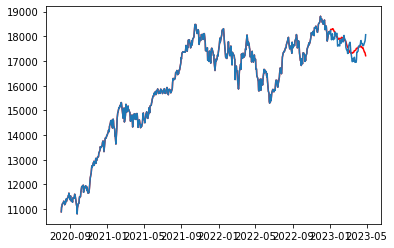

In [147]:
plt.plot(pred_df['ds'],pred_df['y'],color='red')
plt.plot(df['ds'],df['y'])